# NHST II: Test Statistics
We have now reached a point where most of the logic of NHST has been established. To review, we begin by determining what value our parameter of interest would have under the null hypothesis of no effect. We can then compare that value to the actual value we have calculated to produce a *difference* that we have called $\delta$. Using the theoretical sampling distribution of $\delta$, we can establish the probability of this value having occurred *if the null hypothesis were true*. The smaller this probability, the less compatible our data is with the proposed null value. If the probability gets small enough, we can take this as evidence *against* the null hypothesis, implying that the true effect in the population is *unlikely* to be the null value.

## The Logic of Test Statistics
Before we discuss more about calculating these probabilities, we first need to discuss some practical limitations of using the distribution of $\delta$:

- With our current method, we need to construct a new null distribution for every data analysis because the distribution of $\delta$ depends upon both the units of our measurements and the standard error.
- We cannot compare values of $\delta$ across different studies, because $\delta$ is only interpretable within the context of the current analysis.
- The probabilities associated with $\delta$ must also be calculated manually each time, due to the fact that the distribution changes. 

For all these reasons, it is typical to transform $\delta$ into a standardised value known as a *test statistic*. In doing so, we are able to turn a messy and context-specific procedure into a universally interpretable process for inference.

## The $z$-statistic
The first method we can use to standardise $\delta$ is to divide it by its *standard error*. This produces a value that we will call $z$

$$
z = \frac{\delta}{\sqrt{\text{Var}(\delta)}}.
$$

This *scales* $\delta$ into units of standard error. We can think of this as the magnitude of $\delta$, expressed in terms of the number of standard errors the deviation represents. As an example, if $\delta = 6$ and $\sqrt{\text{Var}(\delta)} = 3$, then $z = \frac{6}{3} = 2$. In this situation, the average deviation from 0 is 3, so a $\delta$ of 6 represents 2 of those average deviations. The magnitude of $\delta$ is therefore 2 standard errors away from 0. This is therefore a *standardised* quantity that can be compared and interpreted across studies. In our current example of testing a regression slope against 0, we therefore have

$$
z = \frac{\delta}{\sqrt{\text{Var}(\delta)}} = \frac{\hat{\beta}_{1} - \beta_{1}^{(0)}}{\sqrt{\text{Var}\left(\hat{\beta}_{1} - \beta_{1}^{(0)}\right)}} = \frac{\hat{\beta}_{1}}{\text{SE}\left(\hat{\beta}_{1}\right)} = \frac{\hat{\beta}_{1}}{\sqrt{\frac{\sigma^{2}}{\sum{(x_{i} - \bar{x})^{2}}}}},
$$

where the denominator is often rearranged and written as

$$
z = \frac{\hat{\beta}_{1}}{\sigma / \sqrt{\sum{(x_{i} - \bar{x})^{2}}}}.
$$

The larger $z$ is, the larger $\delta$ is, relative to its standard error. This is useful for interpretation, because the same value of $\delta$ across different experiments may result in different values of $z$, depending upon the degree of uncertainty. The value of $z$ therefore combines the *magnitude* of $\delta$ with the *width* of its sampling distribution. For instance, $\delta = 5$ would be interpreted very differently if the SE was 2 compared to 10. In the first case, the difference is 2.5 times the standard error whereas, in the second case, the difference is only 0.5 the standard error. This is despite $\delta$ being the same in both cases. 

### The Null Distribution of $z$
Beyond changing the interpretation of $\delta$, conversion to a $z$-statistic also changes its distribution under the null. Importantly, in the expression for $z$ above, we have used $\sigma^{2}$ and *not* $\hat{\sigma}^{2}$. So this is based on knowing the population variance, which does not seem particularly useful. However, sometimes assumptions have to be made in order to make progress, so we will stick with this and then address it in more detail below. 

The main utility in assuming $\sigma^{2}$ is known is that the denominator of $z$ become a *constant*. Given that the numerator is just $\hat{\beta}_{1}$ and we known that this is normally distributed, all $z$ is doing is dividing a normal random variable by a constant. This does not change the *shape* of the distribution, it only changes the units. The expected value does not change, but the standard error becomes[^standnorm-foot]

$$
\text{SE}\left(z\right) = \text{SE}\left(\frac{\delta}{\text{SE}(\delta)}\right) = \frac{\text{SE}(\delta)}{\text{SE}(\delta)} = 1.
$$

From this, the distribution of $z$ must be

$$
z \sim \mathcal{N}\left(0,1\right),
$$

which is known as a *standard normal distribution*. 

We can see that this conversion works, irrespective of the scale of the original data, using an example in `R`. The output below shows 4 examples of generating some data using a random mean and a random standard deviation. This data is then *standardised* into a $z$-score and a histogram of the resultant distribution shown, with a standard normal curve on top.

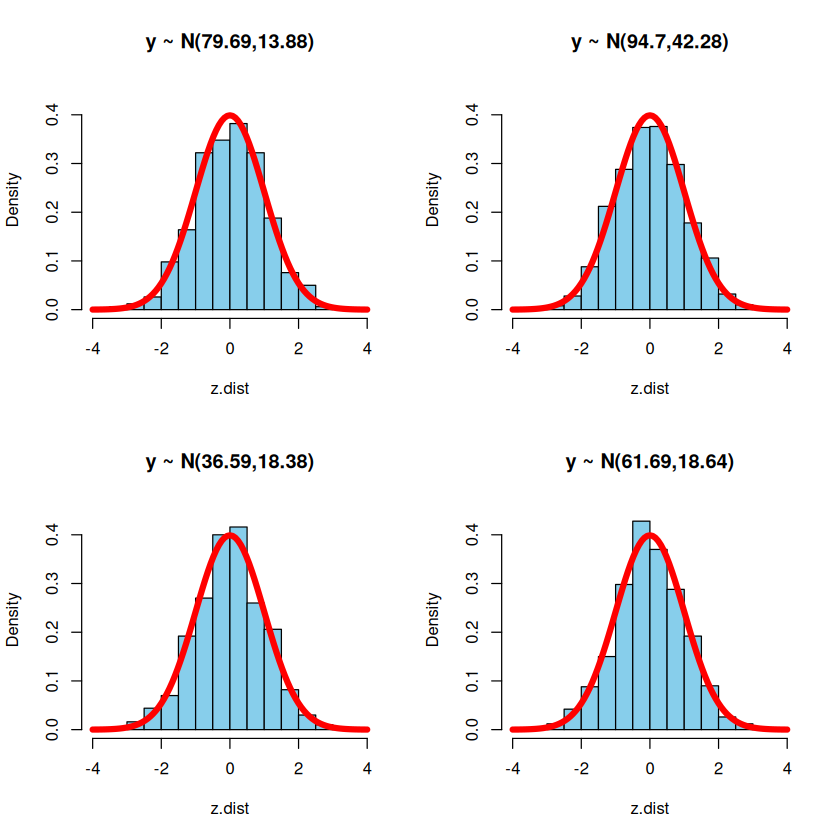

In [1]:
par(mfrow=c(2,2))
set.seed(666)

for (i in 1:4){
    rand.mu <- runif(1, min=10, max=100)             # Random mean
    rand.sd <- runif(1, min=5,  max=50)              # Random SD
    rand.y  <- rnorm(1000, mean=rand.mu, sd=rand.sd) # Generate data
    z.dist  <- (rand.y - mean(rand.y)) / sd(rand.y)  # Standardise
  
    # Histogram of z-transformed data
    title   <- paste0("y ~ N(",round(rand.mu,2),",",round(rand.sd,2),")")
    hist(z.dist, main=title, probability=TRUE, ylim=c(0,0.45), xlim=c(-4,4), col="skyblue")
    
    # Add a standard normal curve
    curve(dnorm(x, mean=0, sd=1), col="red", lwd=5, add=TRUE)  
}

The point of this is to show that, no matter the original units of our data, we can calculate a $z$-statistic that we *know* has a standard normal distribution under the null. So, rather than having to work out the distribution of $\delta$ each time, we can just turn $\delta$ into $z$ and *work with a single distribution*. So, we get an easy to interpret metric of the magnitude of $\delta$ and can pre-compute probabilities to be used with *any* dataset[^prob-foot]. 

### Estimating the Variance
As mentioned above, the calculation of $z$ depended upon knowing $\sigma^{2}$. However, in practise, we do not known $\sigma^{2}$. Instead, we have an *estimated* value, denoted $\hat{\sigma}^{2}$. So how does that change things? For our current example, we can plug the estimated variance into the standard error formula, like so

$$
\widehat{\text{SE}}\left(\delta\right) = \sqrt{\widehat{\text{Var}}\left(\hat{\beta}_{1}\right)} = \sqrt{\frac{\hat{\sigma}^{2}}{(n-1)\sigma^{2}_{x}}},
$$

resulting in a value for the standard error of $\delta$. However, what we have done here is replaced the *constant* $\sigma^{2}$ with the *random variable* $\hat{\sigma}^{2}$. In effect, we have *estimated* the variance of our estimate, meaning that our calculated standard error is now also a *random variable*. This means that we will be introducing additional randomness into the calculation of $z$. The denominator of the test statistic is no longer a constant that simple scales the distribution. Instead, we are now dividing a *random variable* by *another random variable*.

So what happens when we do this? Well, the denominator of $z$ served to scale $\delta$ into standard units.
However, the range of standardised values we get will change depending on how variable the denominator is. When the denominator is constant this is fixed, but when this value is *random* this range changes *dynamically*. So, rather than having a distribution with a fixed-width, you end up with a distribution that changes its width *dynamically*. How this width changes depends upon the precision of our estimated standard error. The *less* precise the estimate, the more we expect extreme value of $z$ to occur. This is because we will get more *underestimates* and more *overestimates* of the true value. This will be reflected in a null distribution that is *wider* than a standard normal. 

```{admonition} Why Does This Matter?
:class: warning
The ramifications of having a null distribution that is *wider* than we think is that our calculated probabilities will be *wrong*. If we were to use a standard normal distribution to calculate probabilities when $n$ is small, then the probabilities of extreme values would be *too small*. If we calculate a large discrepancy from the null, this would then appear *rarer* than it actually is and we would be overstating how incompatible our data are with the null hypothesis. In other words, we may well reach the *wrong conclusion*.
```


So what governs the precision of this estimate (and thus the width of the null distribution)? As we saw earlier with the sampling distribution of $\beta_{1}$, this is governed by the *sample size*. We can illustrate this using some simulations in `R`. The output below shows the null distribution of $z$ when the SE is estimated (*left* column) and when the SE is known (*right* column). The empirical distribution from the simulations is shown as a solid line, with the theoretical standard normal distribution shown as a dashed line. When the sample size is *small* and the SE is *estimated*, we can see that the empirical distribution is *wider* than a standard normal. This discrepancy decreases as $n$ gets larger. However, when the SE is *known*, the standard normal fits, irrespective of the sample size.

In [2]:
options(repr.plot.height=14)

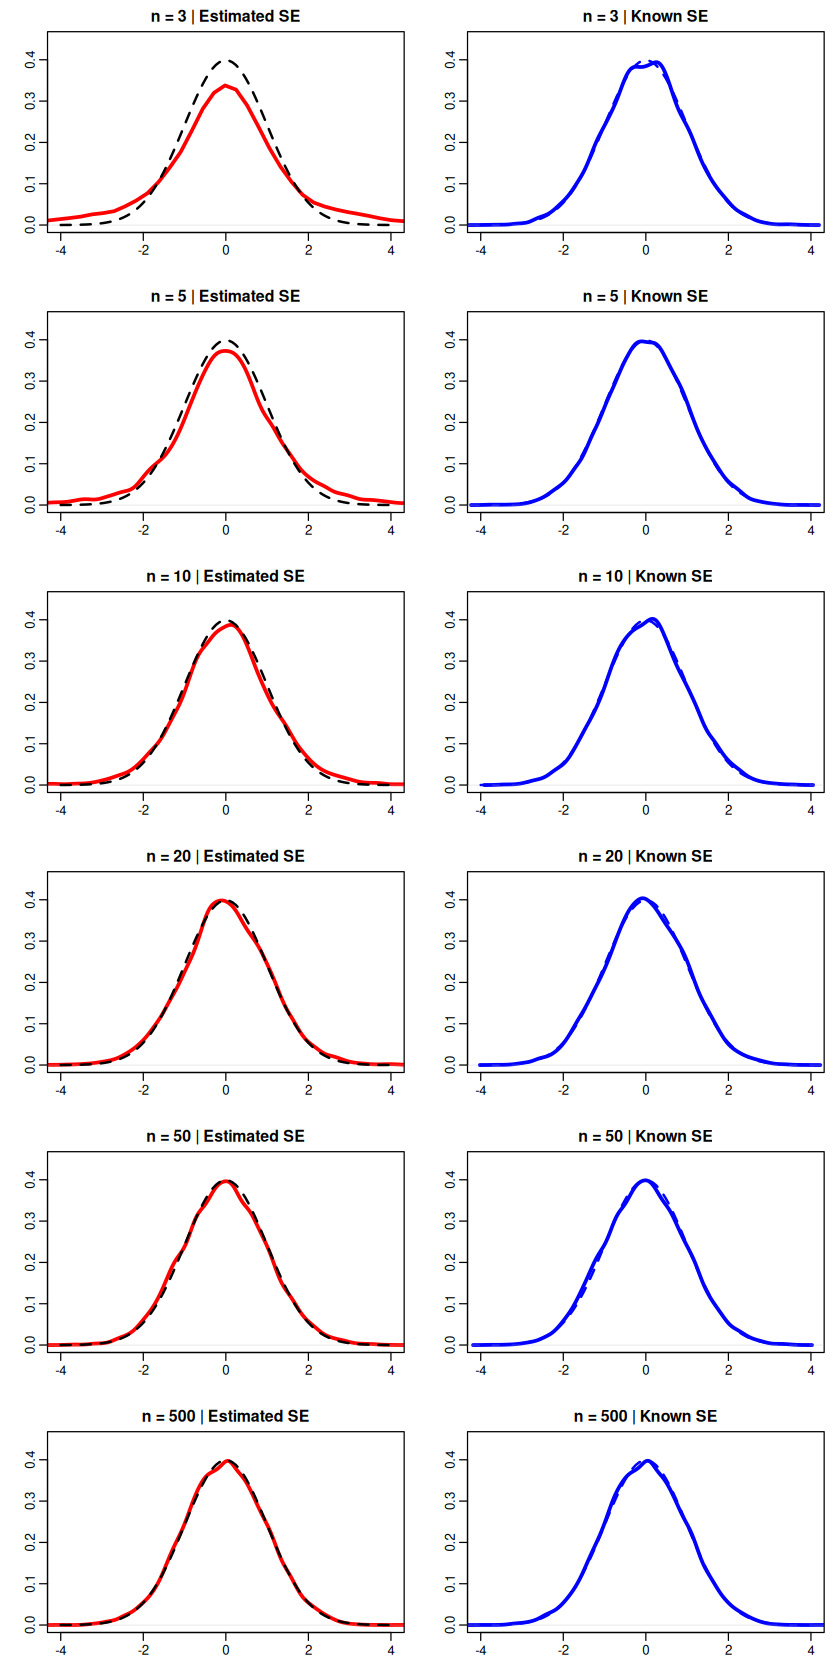

In [3]:
set.seed(123)

# Sample sizes to test
sample.sizes <- c(3,5,10,20,50,500)
n.sims       <- 10000
true.sd      <- 1
mu           <- 0

# Set up plotting area: rows = sample sizes, 2 columns (estimated vs known SE)
par(mfrow = c(length(sample.sizes), 2), mar=c(3,3,2,1), mgp=c(2,0.6,0))

for (n in sample.sizes) {
     z.est   <- rep(0,n.sims)  
     z.known <- rep(0,n.sims)  
  
     for (i in 1:n.sims) {
          # Generate data
          y <- rnorm(n, mean=mu, sd=true.sd)
    
          # Test statistics
          z.est[i]   <- (mean(y) - mu) / (sd(y)   / sqrt(n)) # estimated
          z.known[i] <- (mean(y) - mu) / (true.sd / sqrt(n)) # known
     }
  
     # Density estimates
     d.est   <- density(z.est)
     d.known <- density(z.known)
 
     ## --- LEFT: Estimated SE ---
     plot(d.est, col="red", lwd=3, main=paste("n =", n, "| Estimated SE"),
          xlab="", ylab="", xlim=c(-4,4), ylim=c(0,0.45))
  
     curve(dnorm(x), col="black", lty=2, lwd=2, add=TRUE)
  
     ## --- RIGHT: Known SE ---
     plot(d.known, col="blue", lwd=3, main=paste("n =", n, "| Known SE"),
          xlab="", ylab="", xlim=c(-4,4), ylim=c(0,0.45))
  
     curve(dnorm(x), col="blue", lwd=2, lty=2, add=TRUE)
}


````{admonition} Implications for Sample Size
:class: warning
Be aware that although the plots above may imply that everything is fine so long as we use a sample size of 50 or more, the scaling of the plots actually hides the truth. Although we cannot see it from such a zoomed-out perspective, if we were to rescale the plots so we can see the tails close up, a discrepancy between the empirical and theoretical distributions would still exist. As $n$ increases, the discrepancy will get smaller and smaller, but this is not the same as saying that there is *no* difference.
````

## The $t$-statistic
Because of the difference between using the true standard error and an estimate of the standard error, when we divide $\delta$ by an *estimated* value we call the resultant statistic a $t$, rather than $z$[^studentz-foot]

$$
t = \frac{\delta}{\sqrt{\widehat{\text{Var}}\left(\delta\right)}},
$$

which we can rewrite for our current example as

$$
t = \frac{\hat{\beta}_{1}}{\hat{\sigma} / \sqrt{\sum{(x_{i} - \bar{x})^{2}}}},
$$

or

$$
t = \frac{\hat{\beta}_{1}}{\hat{\sigma} / \sqrt{(n-1)\sigma^{2}_{x}}}.
$$

The corresponding null distribution for this $t$-statistic is, unsurprisingly, known as the $t$-distribution. As discussed above, given the uncertainty in the estimation of the denominator of the $t$-statistic, the $t$-distribution is able to dynamically reshape its width. This is achieved using a single parameter denoted $\nu$, more commonly known as the *degrees of freedom*. The value of $\nu$ is directly informed by the sampling distribution of $\hat{\sigma}^{2}$. This is a bit complicated, but the only element that really matters is that this distribution reflects the uncertainty in estimation due to the sample size and is the part of the denominator that influences the width of the $t$-distribution. As illustrated below, for small values of $\nu$ the $t$-distribution is wider and fatter than a standard normal. As $\nu$ grows, the width shrinks and the $t$-distribution approaches a standard normal.

In [4]:
options(repr.plot.height=7)

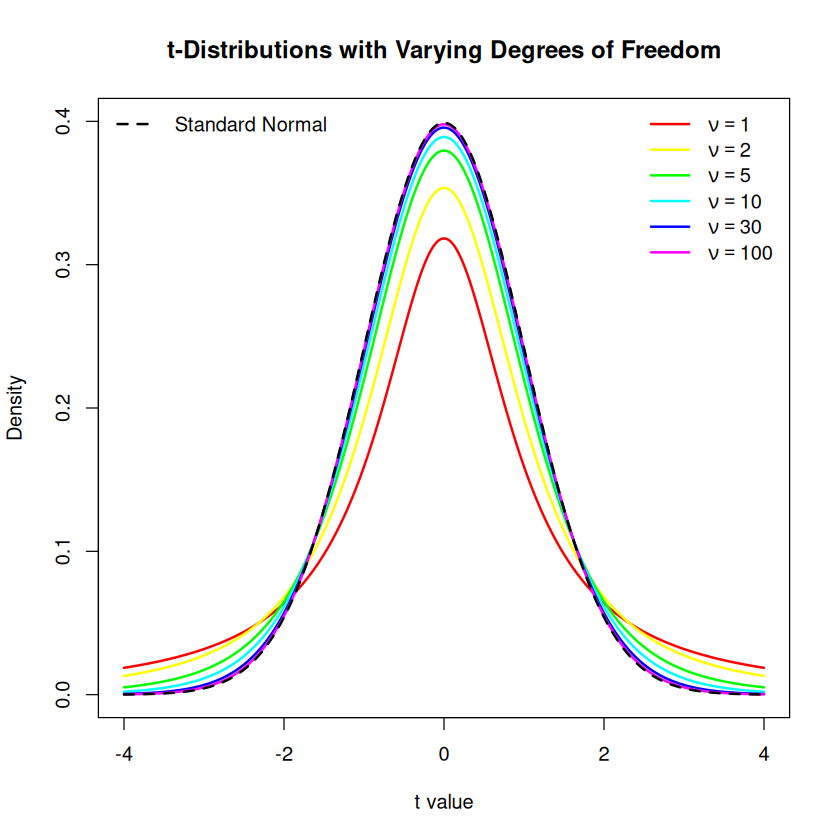

In [5]:
# Set up the x-axis range
x <- seq(-4, 4, length.out = 500)

# Define degrees of freedom to compare
dfs <- c(1, 2, 5, 10, 30, 100)

# Set up plot
plot(x, dt(x, df = 1), type = "n", ylim = c(0, 0.4),
     xlab = "t value", ylab = "Density",
     main = "t-Distributions with Varying Degrees of Freedom")

# Define a color palette
colors <- rainbow(length(dfs))

# Add lines for each t-distribution
for (i in seq_along(dfs)) {
  lines(x, dt(x, df = dfs[i]), col = colors[i], lwd = 2)
}

# Add standard normal distribution for reference
lines(x, dnorm(x), col = "black", lwd = 2, lty = 2)

# Add legend
labels <- paste0("nu == ", dfs)
legend("topright", 
      legend=parse(text=labels),
      col=colors, 
      lwd=2, 
      bty="n")

legend("topleft", legend = "Standard Normal", col = "black", lty = 2, lwd = 2, bty = "n")



```{admonition} Student and the History of the $t$-statistic
:class: tip
The development of the $t$-statistic is an interesting part of the history of modern statistics. The additional uncertainty added by using an estimate of the variance in small samples was not appreciated by statisticians before a seminal publication by Student in 1908. Prior to this, statisticians would just use $z$-statistics and assume that the estimate of the variance could just be used as a close approximation of the population value. The paper titled [The Probable Error of a Mean](https://www.jstor.org/stable/2331554) changed this thinking and introduced the world to the concept of the $t$-statistic and the $t$-distribution. The author was named [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset), who was a statistician working for Guinness. However, due to previous disclosures of trade secrets through scientific publication, Guinness only allowed their staff to publish on condition that they did not mention:

1. Beer
2. Guinness
3. Their own surname

As such, Gosset published his work on the $t$-distribution under the pseudonym "Student". Because of this, the null distribution is still often referred to as "Student's $t$-distribution". Unfortunately, Gosset's work fell largely on deaf ears until Fisher realised the usefulness of these results when developing his own methods several years later. Indeed, it was Fisher who, in a [series of letters to Gosset](https://www.jstor.org/stable/2683142?origin=crossref), corrected the derivation of the $t$-distribution by suggesting the use of the *degrees of freedom*, not the total sample size (as Gosset originally thought). This is an interesting historical point as it shows that the concept of degrees of freedom were not intuitive for statisticians and, in fact, were quite a controversial idea when [first introduced](https://www.jstor.org/stable/2340521?seq=1) by Fisher.
```

## Other Test Statistics
There are many more test statistics in the world beyond the $z$-statistic and the $t$-statistic. As we move forward on this course, we will see other test statistics introduced. In all cases, the logic of using the statistic is the same. Whatever our null hypothesis may be, we want to place the calculated discrepancy from the null on a standardised scale that can be understood by anyone, irrespective of the original units of the data. Ideally, the null distribution of this statistic should also be dynamic to reflect uncertainty in the estimation of the standard error in small samples. However, if this is not possible, then we can still use statistics with a fixed null distribution and treat them as *asymptotically correct*. This means that the probabilities calculated from these distributions are correct, but only as $n$ gets larger[^infinitefoot]. This may seem a strange approach to take, however, we will see later on the course that there are some models where the concept of *degrees of freedom* causes problems because they become impossible to verify. This means that either an approximation is needed, or we have to abandon the concept entirely. We will discuss this more at a later date.

`````{topic} What do you now know?
In this section, we have explored the second part of NHST in terms of defining a test-statistic. After reading this section, you should have a good sense of:

- Why it is more practical to turn our raw difference $\delta$ in a standardised value, to allow for easier interpretation and, historically, easier calculation of probabilities.
- The logic behind the $z$-statistic, which divides $\delta$ by its standard error, rescaling $\delta$ into standard error units. 
- The idea that this rescaling alters the distribution of $\delta$ such that $z$ follows a standard normal distribution under the null, irrespective of the original units of the data.
- The idea that the $z$-statistic is based on assuming that $\sigma^{2}$ is known, when in reality we almost always have to *estimate* this value.
- The principle that when we *estimate* the variance (and thus estimate the standard error), the resultant test statistic is known as a $t$-statistic and follows a $t$-distribution under the null.
- The concept that the $t$-distribution is able to flexibly adapt to the uncertainty in the estimation of the standard error by altering its width, as governed by its *degrees of freedom*.
`````

[^studentz-foot]: This was value was originally called Student's $z$-statistic, but the name was later changed to the $t$-statistic by Fisher.

[^infinitefoot]: Mathematically, we would say "in the limit, as $n$ approaches infinity", written $n \rightarrow \infty$. Obviously, an infinite sample size is a silly thing to consider, however, this is just a mathematical vehicle for reaching results that hold as the sample size gets larger and larger. When using asymptotically correct null distributions, either a large sample size is needed, or additional caution is warranted in small samples.

[^standnorm-foot]: This derivation is missing some steps, so do not worry if there seem to be some leaps. In order to derive it fully you need use rules around variances for linear transformations and that is all way beyond the point here.

[^prob-foot]: Although these days probabilities can be calculated directly using computers, in the past tables of probabilities for the standard normal distribution were published in books so that working statisticians could use them. Part of the utility of a test statistic was to allow these methods to be used *practically*. Rather than calculating these values by hand, a statistician could convert things into a *known* value and then use the published tables to calculate a probability.